____
# Lesson 4: Data Exploration and Scikit-Learn (continued)
____
In this final Python lesson, we'll use everything we've learned so far and work with some real datasets. We'll also finally use the Scikit-Learn library (called `sklearn` in Python) to do some basic machine learning on some sample data.


## Some important imports

In Jupyter Notebooks, we can import the libraries we need once, and then use the libraries on all future code blocks without needing to re-import everything. 

Run the following code block:

In [ ]:
%matplotlib inline
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
data=pd.read_csv("/content/data.csv",index_col=0)
phenos=pd.read_csv("/content/actual.csv",index_col=0)

# ignore warnings
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# some code to control figure aeshetics
sns.set_style("ticks")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

# Rapid Fire Review Questions

In [ ]:
example = pd.DataFrame([["A1","B1","C1"],["A2","B2","C2"],["A3","B3","C3"]], 
                       index=[1,2,3],columns=["A","B","C"])
example

,A,B,C
1,A1,B1,C1
2,A2,B2,C2
3,A3,B3,C3


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········


KeyboardInterrupt: ignored

### Q1: Extract element **C2** using `.loc`

In [ ]:
example.loc[[2],['C']]

,C
2,C2


### Q2: Extract **B2** using `.iloc`

In [ ]:
example.iloc[[1],[1]]

,B
2,B2


### Q3: Get column **B** from the dataframe


In [ ]:
example.iloc[:,[1]]

,B
1,B1
2,B2
3,B3


### Q4: Add column **D** and fill values with *D1, D2, and D3*

In [ ]:
example.insert(3,"D", ["D1","D2","D3"])
example

,A,B,C,D
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


### OUR GOAL: To predict whether a leukemia case is AML or ALL subtype from gene expression

ALL| AML | 
----------------------------------|------------------------------|
![Acute Lymphoblastic Leukemia (ALL)](https://upload.wikimedia.org/wikipedia/commons/thumb/0/0e/Acute_leukemia-ALL.jpg/200px-Acute_leukemia-ALL.jpg) |![Acute Myeloid Leukemia (AML)](https://s7d2.scene7.com/is/image/stjude/aml-leukemia-bm-m4?fit=crop,1&wid=200)



Things we need to define:

1. What is our input?
1. What features should we include?
1. What is our output?
1. What is our model?
1. What hyperparameters do we need to define?
1. How well did we do on prediction?



# Loading our data (this time the right way)

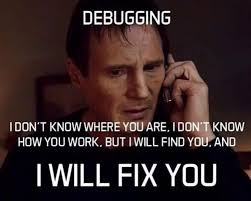

In [ ]:
data = pd.read_csv("data.csv",index_col=0) # for tab you would use sep = "\t"
phenos = pd.read_csv("actual.csv",index_col=0)
# phenos has it's sample IDs as ints
# but data has them as strings
# lets make them the same!
phenos.index = phenos.index.astype(str) # the line that would have saved us yesterday

In [ ]:
data.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72
Gene Accession Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AFFX-BioB-5_at,-214,-139,-76,-135,-106,-138,-72,-413,5,-88,-165,-67,-92,-113,-107,-117,-476,-81,-44,17,-144,-247,-74,-120,-81,-112,-273,-4,15,-318,-32,-124,-135,-20,7,-213,-25,-72,-342,-87,-62,22,86,-146,-187,-56,-243,-130,-256,-118,-112,-21,-202,-90,-34,-95,-137,-157,-12,-172,-47,-176,-161,-48,-62,-58,-76,-154,-79,-55,-59,-131
AFFX-BioB-M_at,-153,-73,-49,-114,-125,-85,-144,-260,-127,-105,-155,-93,-119,-147,-72,-219,-213,-150,-51,-229,-199,-90,-321,-263,-150,-233,-327,-116,-114,-192,-49,-79,-186,-207,-100,-252,-20,-139,-200,-248,-23,-153,-36,-74,-187,-43,-218,-177,-249,-142,-185,-13,-274,-87,-144,-118,-51,-370,-172,-122,-442,-284,-215,-531,-198,-217,-98,-136,-118,-44,-114,-126
AFFX-BioB-3_at,-58,-1,-307,265,-76,215,238,7,106,42,-71,84,-31,-118,-126,-50,-18,-119,100,79,-157,-168,-11,-114,-85,-78,-76,-125,2,-95,49,-37,-70,-50,-57,136,124,-1,41,262,-7,17,-141,170,312,43,-163,-28,-410,212,24,8,59,102,-17,59,-82,-77,12,38,-21,-81,-46,-124,-5,63,-153,49,-30,12,23,-50
AFFX-BioC-5_at,88,283,309,12,168,71,55,-2,268,219,82,25,173,243,149,257,301,78,207,218,132,-24,-36,255,316,54,81,241,193,312,230,330,337,101,132,318,325,392,328,295,142,276,252,174,142,177,182,266,24,314,170,38,309,319,152,270,178,340,172,31,396,9,146,431,141,95,237,180,68,129,146,211
AFFX-BioC-3_at,-295,-264,-376,-419,-230,-272,-399,-541,-210,-178,-163,-179,-233,-127,-205,-218,-403,-152,-146,-262,-151,-308,-317,-342,-418,-244,-439,-191,-51,-139,-367,-188,-407,-369,-377,-209,-396,-324,-224,-226,-233,-211,-201,-32,114,-116,-289,-170,-535,-401,-197,-128,-456,-283,-174,-229,-135,-438,-137,-201,-351,-294,-172,-496,-256,-191,-215,-257,-110,-108,-171,-206


In [ ]:
phenos.head()

,cancer
patient,
1,ALL
2,ALL
3,ALL
4,ALL
5,ALL


In [ ]:
phenos.index

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37',
       '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
       '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61',
       '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72'],
      dtype='object', name='patient')

# A few informative plots from last time

### Bar plot of counts

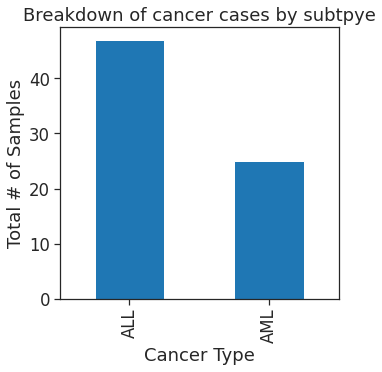

In [ ]:
# First we can plot cases by country
# pandas has a convenient function for this
count_by_cancer = phenos.groupby(['cancer']).size()
count_by_cancer.plot.bar(y="patient",figsize=(5,5),legend=False)
# setting labels make plots more informative
plt.xlabel("Cancer Type")
plt.ylabel("Total # of Samples")
# titles are important for plot interpretation!
plt.title("Breakdown of cancer cases by subtpye")
plt.show()

### Principal Components Analysis (PCA)

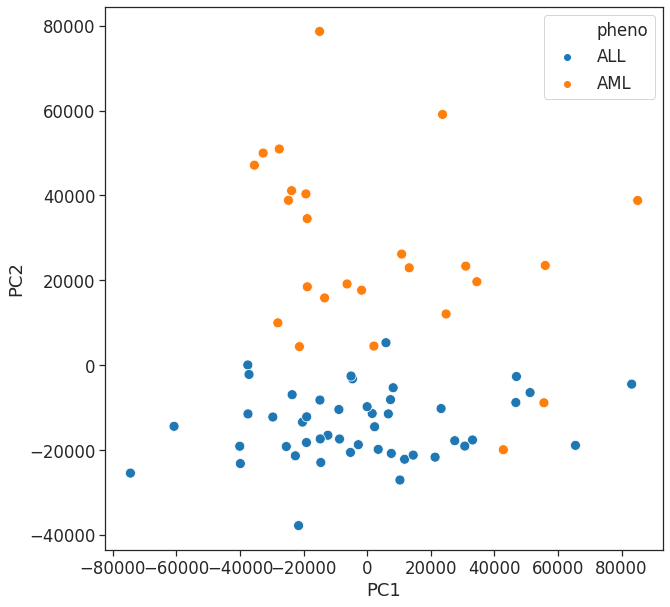

In [ ]:
from sklearn.decomposition import PCA
# set-up our PCA model
pca = PCA(2)
# fit model
#T stands for transpose
pca.fit(data.T)
# apply the dimensionality reduction to your data 
x_pca = pd.DataFrame(pca.transform(data.T),columns = ["PC1","PC2"],index=data.columns)
x_pca["pheno"] = phenos["cancer"]
# plot
fig,ax = plt.subplots(figsize=(10,10))
#s makes the points bigger
sns.scatterplot(x = "PC1", y = "PC2",hue="pheno",s=100,data=x_pca,ax=ax)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Data Clean-up / Quality Control

This is an important step in any analysis!! Arguably more important than creating your machine learning models because without "good" data we can't accurately make predictions.

## Step 1: Check for missing values
Machine learning models usually don't like NAs... we should make sure we don't have any and if we do we need to remove them!

In [ ]:
# We can use .isna to check which data entries are missing
# .any tells us if each column contains any mising values\
# what happens when you run data.isna().all() or data.isna().any(axis=1)
data.isna().any(axis = 1)
#axis = 1 checks across the genes

Gene Accession Number
AFFX-BioB-5_at    False
AFFX-BioB-M_at    False
AFFX-BioB-3_at    False
AFFX-BioC-5_at    False
AFFX-BioC-3_at    False
                  ...  
X83863_at         False
Z17240_at         False
L49218_f_at       False
M71243_f_at       False
Z78285_f_at       False
Length: 7129, dtype: bool

In [ ]:
data.loc[data.isna().any(axis=1), :]

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72
Gene Accession Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [ ]:
data.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72
Gene Accession Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AFFX-BioB-5_at,-214,-139,-76,-135,-106,-138,-72,-413,5,-88,-165,-67,-92,-113,-107,-117,-476,-81,-44,17,-144,-247,-74,-120,-81,-112,-273,-4,15,-318,-32,-124,-135,-20,7,-213,-25,-72,-342,-87,-62,22,86,-146,-187,-56,-243,-130,-256,-118,-112,-21,-202,-90,-34,-95,-137,-157,-12,-172,-47,-176,-161,-48,-62,-58,-76,-154,-79,-55,-59,-131
AFFX-BioB-M_at,-153,-73,-49,-114,-125,-85,-144,-260,-127,-105,-155,-93,-119,-147,-72,-219,-213,-150,-51,-229,-199,-90,-321,-263,-150,-233,-327,-116,-114,-192,-49,-79,-186,-207,-100,-252,-20,-139,-200,-248,-23,-153,-36,-74,-187,-43,-218,-177,-249,-142,-185,-13,-274,-87,-144,-118,-51,-370,-172,-122,-442,-284,-215,-531,-198,-217,-98,-136,-118,-44,-114,-126
AFFX-BioB-3_at,-58,-1,-307,265,-76,215,238,7,106,42,-71,84,-31,-118,-126,-50,-18,-119,100,79,-157,-168,-11,-114,-85,-78,-76,-125,2,-95,49,-37,-70,-50,-57,136,124,-1,41,262,-7,17,-141,170,312,43,-163,-28,-410,212,24,8,59,102,-17,59,-82,-77,12,38,-21,-81,-46,-124,-5,63,-153,49,-30,12,23,-50
AFFX-BioC-5_at,88,283,309,12,168,71,55,-2,268,219,82,25,173,243,149,257,301,78,207,218,132,-24,-36,255,316,54,81,241,193,312,230,330,337,101,132,318,325,392,328,295,142,276,252,174,142,177,182,266,24,314,170,38,309,319,152,270,178,340,172,31,396,9,146,431,141,95,237,180,68,129,146,211
AFFX-BioC-3_at,-295,-264,-376,-419,-230,-272,-399,-541,-210,-178,-163,-179,-233,-127,-205,-218,-403,-152,-146,-262,-151,-308,-317,-342,-418,-244,-439,-191,-51,-139,-367,-188,-407,-369,-377,-209,-396,-324,-224,-226,-233,-211,-201,-32,114,-116,-289,-170,-535,-401,-197,-128,-456,-283,-174,-229,-135,-438,-137,-201,-351,-294,-172,-496,-256,-191,-215,-257,-110,-108,-171,-206


In this dataset we don't actually have any missing data, but it is something that is important to check.

**If there were missing values how should we have handled it?**

## Step 2: Reformat data
Most machine learning tools expect datasets to be samples x features but our dataset is features x samples. We can transpose the matrix for later analysis.

In [ ]:
data = data.T

In [ ]:
data.shape

(72, 7129)

In [ ]:
data.head()

Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,AFFX-BioB-M_st,AFFX-BioB-3_st,AFFX-BioC-5_st,AFFX-BioC-3_st,AFFX-BioDn-5_st,AFFX-BioDn-3_st,AFFX-CreX-5_st,AFFX-CreX-3_st,hum_alu_at,AFFX-DapX-5_at,AFFX-DapX-M_at,AFFX-DapX-3_at,AFFX-LysX-5_at,AFFX-LysX-M_at,AFFX-LysX-3_at,AFFX-PheX-5_at,AFFX-PheX-M_at,AFFX-PheX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-ThrX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,AFFX-TrpnX-3_at,AFFX-HUMISGF3A/M97935_5_at,AFFX-HUMISGF3A/M97935_MA_at,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMISGF3A/M97935_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,...,X53065_f_at,X64177_f_at,X67491_f_at,X71345_f_at,X97444_f_at,Z80780_f_at,X00351_f_at,X01677_f_at,M31667_f_at,L41268_f_at,X99479_f_at,HG658-HT658_f_at,M94880_f_at,S80905_f_at,X03068_f_at,Z34822_f_at,U87593_f_at,U88902_cds1_f_at,AC002076_cds2_at,D64015_at,HG2510-HT2606_at,L10717_at,L34355_at,L78833_cds4_at,M13981_at,M21064_at,M93143_at,S78825_at,U11863_at,U29175_at,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,-41,-831,-653,-462,75,381,-118,-565,15091,7,311,-231,21,-107,165,-78,-204,29,-61,-105,-366,-41,-346,-297,-109,-13,215,797,14538,9738,...,391,-763,172,149,341,788,21210,13771,598,396,245,14476,10882,701,2762,-325,-67,346,-68,229,-14,108,28,349,61,273,384,-306,-1827,1582,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,19,-743,-239,-83,182,164,-141,-423,11038,37,134,-161,-21,-180,18,-120,-65,97,15,-49,-330,-41,-772,-259,-192,-219,116,433,615,115,...,200,51,154,418,433,736,21059,15097,563,171,-149,13686,11789,76,1567,-191,-88,290,14,194,56,303,-242,214,-28,143,231,-336,-2380,624,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,19,-1135,-962,-232,208,432,84,-501,16692,183,378,-221,67,-203,238,-124,-161,36,-23,-80,-481,-65,-620,-269,-136,104,476,1474,5669,3272,...,387,-474,180,272,591,959,24292,17378,1808,363,325,6560,5023,804,1090,-258,9,220,-58,294,95,143,-25,464,513,238,720,-204,-1772,753,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,363,-934,-577,-214,142,271,-107,-101,15763,45,268,-27,43,-52,247,-116,-208,22,-10,-74,-240,-33,-560,-261,-366,-148,155,415,4850,2293,...,317,-336,325,149,173,431,17558,13818,576,455,594,8955,9567,367,1708,-357,45,430,-35,128,42,22,-131,342,142,277,307,-320,-2022,743,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,155,-471,-490,-184,32,213,1,-260,18128,-28,118,-153,-8,-111,44,-88,-102,32,5,-18,-228,53,-348,-169,-156,-55,122,483,1284,2731,...,162,-56,279,183,259,605,18530,15619,65,122,126,8443,8512,182,1503,-78,29,159,18,71,42,44,-33,159,71,134,178,-182,-179,626,156,649,57,504,-26,250,314,14,56,-25


## Step 3: Split data into training and testing

Remember that in classification, which is a type of supervised machine learning, we must use a training set to teach our model how to correctly classify future examples. We also use a test set to test how good our model is.



The first step that we'll do is break up the dataset into training set and test set. We should split our data so that we have both AML and ALL cases present in both the training and testing data.



**What happens if we randomly create training and test data?**

In [ ]:
from sklearn.model_selection import train_test_split

# Split up the X (data) and y (phenos) datasets into train and test sets
# 25% of the dataset will be used for the test set
X_train, X_test, y_train, y_test = train_test_split(data,phenos,stratify=phenos,
                                                    test_size=0.3,random_state=35,)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50, 7129)
(22, 7129)
(50, 1)
(22, 1)


### Exercise: Get AML and ALL counts in the training and testing data

In [ ]:
countDictTrain = {"AML":0, "ALL":0}
for cancer in y_train["cancer"]:
  countDictTrain[cancer] += 1
print(countDictTrain)

countDictTest = {"AML":0, "ALL":0}
for cancerType in y_test["cancer"]:
  countDictTest[cancer] += 1
print(countDictTest)

y_train.groupby("cancer").size()

{'AML': 17, 'ALL': 33}
{'AML': 22, 'ALL': 0}


cancer
ALL    33
AML    17
dtype: int64

# Time for some machine learning with `scikit-learn`!

## Decision Trees

### Training our decision tree

Now that we've split our data into a training set and a test set, it's time to train our decision tree.

#### Decision trees are made up of features selected from our dataset. These features are transformed into "decisions" that can be used to separate out our class labels from each other. 

One of the major advantages with using a Decision Tree is that we can see visually how it makes its decisions. This **transparency** is not true for all models and is actually one of the big research questions in AI today.

For example, machine learning is often used in government agencies today. If a model makes a decision that can affect whether someone gets health care or a loan, they should be able to ask *why* the system made the decision that it did.

Let's visualize the decision tree below:


![](https://46gyn61z4i0t1u1pnq2bbk2e-wpengine.netdna-ssl.com/wp-content/uploads/2018/07/what-is-a-decision-tree.png)


Now that we have a basic understanding of decision trees lets construct one from our dataset!

In [ ]:
# sklearn has these classifiers built in
# We're going to import the decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Initialize the classifier with a max_depth of 5
classifier = DecisionTreeClassifier(max_depth=5,random_state=35)

# Fit the classifier to the training set
# This is the training process!! sklearn makes it super easy for us
classifier = classifier.fit(X_train, y_train)

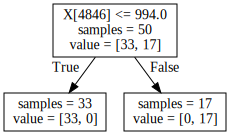

In [ ]:
from sklearn import tree
import graphviz 

dot_data = tree.export_graphviz(classifier, out_file=None, impurity=False) 
graph = graphviz.Source(dot_data) 
graph

It takes some practice to read the visualization of the decision tree, but it's actually quite informative. The root node of the decision tree starts with the line `X[4846] <= 994.0`. This is the condition that splits the tree. In this case, it's saying that we should look at the feature with index 4846 (X95735_at) and see if it's less than or equal to 994.0. If this is true, we will follow the tree to the left child. If this is false, we will follow the tree to the right child.

The `samples = 50` line means that at this node, we still have 50 samples to look at.

The `[33,17]` line tells us that of these 50 samples, 33 are the zeroth class (ALL) and 17 are the first class (AML).

After the first split, we'll see that we did really well! All 33 samples of ALL are correctly classified in the left child of the root. We don't even need multiple features because we already achieve perfect seperation!

If there were more features required we could follow the visualization for the rest of the decision tree to see what feature it splits on at each node.

### Exercise: Create a heatmap showing the expression of this gene

In [ ]:
data.head()

Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,AFFX-BioB-M_st,AFFX-BioB-3_st,AFFX-BioC-5_st,AFFX-BioC-3_st,AFFX-BioDn-5_st,AFFX-BioDn-3_st,AFFX-CreX-5_st,AFFX-CreX-3_st,hum_alu_at,AFFX-DapX-5_at,AFFX-DapX-M_at,AFFX-DapX-3_at,AFFX-LysX-5_at,AFFX-LysX-M_at,AFFX-LysX-3_at,AFFX-PheX-5_at,AFFX-PheX-M_at,AFFX-PheX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-ThrX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,AFFX-TrpnX-3_at,AFFX-HUMISGF3A/M97935_5_at,AFFX-HUMISGF3A/M97935_MA_at,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMISGF3A/M97935_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,...,X53065_f_at,X64177_f_at,X67491_f_at,X71345_f_at,X97444_f_at,Z80780_f_at,X00351_f_at,X01677_f_at,M31667_f_at,L41268_f_at,X99479_f_at,HG658-HT658_f_at,M94880_f_at,S80905_f_at,X03068_f_at,Z34822_f_at,U87593_f_at,U88902_cds1_f_at,AC002076_cds2_at,D64015_at,HG2510-HT2606_at,L10717_at,L34355_at,L78833_cds4_at,M13981_at,M21064_at,M93143_at,S78825_at,U11863_at,U29175_at,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,-41,-831,-653,-462,75,381,-118,-565,15091,7,311,-231,21,-107,165,-78,-204,29,-61,-105,-366,-41,-346,-297,-109,-13,215,797,14538,9738,...,391,-763,172,149,341,788,21210,13771,598,396,245,14476,10882,701,2762,-325,-67,346,-68,229,-14,108,28,349,61,273,384,-306,-1827,1582,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,19,-743,-239,-83,182,164,-141,-423,11038,37,134,-161,-21,-180,18,-120,-65,97,15,-49,-330,-41,-772,-259,-192,-219,116,433,615,115,...,200,51,154,418,433,736,21059,15097,563,171,-149,13686,11789,76,1567,-191,-88,290,14,194,56,303,-242,214,-28,143,231,-336,-2380,624,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,19,-1135,-962,-232,208,432,84,-501,16692,183,378,-221,67,-203,238,-124,-161,36,-23,-80,-481,-65,-620,-269,-136,104,476,1474,5669,3272,...,387,-474,180,272,591,959,24292,17378,1808,363,325,6560,5023,804,1090,-258,9,220,-58,294,95,143,-25,464,513,238,720,-204,-1772,753,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,363,-934,-577,-214,142,271,-107,-101,15763,45,268,-27,43,-52,247,-116,-208,22,-10,-74,-240,-33,-560,-261,-366,-148,155,415,4850,2293,...,317,-336,325,149,173,431,17558,13818,576,455,594,8955,9567,367,1708,-357,45,430,-35,128,42,22,-131,342,142,277,307,-320,-2022,743,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,155,-471,-490,-184,32,213,1,-260,18128,-28,118,-153,-8,-111,44,-88,-102,32,5,-18,-228,53,-348,-169,-156,-55,122,483,1284,2731,...,162,-56,279,183,259,605,18530,15619,65,122,126,8443,8512,182,1503,-78,29,159,18,71,42,44,-33,159,71,134,178,-182,-179,626,156,649,57,504,-26,250,314,14,56,-25


In [ ]:
X_train.iloc[:, 4846].name

'X95735_at'

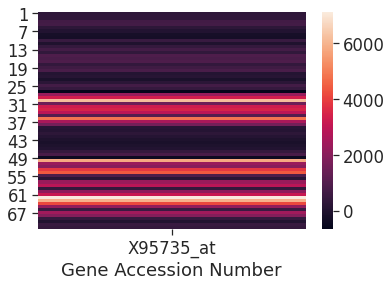

In [ ]:
model_gene = data.loc[:, ["X95735_at"]]
sns.heatmap(model_gene)
plt.show()

## Testing our decision tree

We've trained our decision tree and visualized it, but we have not yet tested it to see how well it does. This is where the test set comes in -- the test set is a set of correctly labelled examples that we have withheld from the decision tree, so we can test to see if the predictions made by the decision tree match the correct labels.

With `sklearn`, it's really easy to generate our predicted labels for the test set:

In [ ]:
# Create a list of predicted classes for each of the examples in the test set
y_predict = classifier.predict(X_test)

print(y_predict)

['ALL' 'ALL' 'ALL' 'ALL' 'AML' 'ALL' 'AML' 'AML' 'AML' 'AML' 'ALL' 'AML'
 'AML' 'AML' 'ALL' 'ALL' 'ALL' 'ALL' 'AML' 'ALL' 'ALL' 'ALL']


In order to find the accuracy of our classifier on the test set, we use the function `score()`, which takes two parameters: (1) the data of the test set, and (2) the correct labels of the test set.

It will automatically compare our predicted label with the correct label to compute the accuracy.

In [ ]:
accuracy = classifier.score(X_test, y_test)
print(accuracy)

0.8636363636363636


And we're done! In a few lines of code, we've actually:

*  Loaded our dataset
*  Picked our classifier to use
* Trained our classifier on the dataset
* Tested our classifier on unseen data

If we are satisfied with the performance of our classifier on the test set, we're ready to go, to use this model on real data in the real world!

Just to show you how little code we actually have to write to train and test a classifier, here's everything in one code block:

In [ ]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(data,phenos,
                                                    stratify=phenos,
                                                    test_size=0.3,
                                                    random_state=35,)

classifier = DecisionTreeClassifier(max_depth=5,random_state=35)
classifier = classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)
classifier.score(X_test, y_test)

0.8636363636363636

In these few lines of code, we turned everything we learned about with classification and decision trees in the morning lessons into code, and used it on an actual dataset!

## The Confusion Matrix

The code above told us how accurate the decision tree was, but what if we wanted some more details about which sorts of classifications we got right and wrong? That's where the confusion matrix comes in.

We'll use the familiar `matplotlib` library to accomplish this visualization, but we'll also use a library called `seaborn` to make our visualization look a bit nicer:

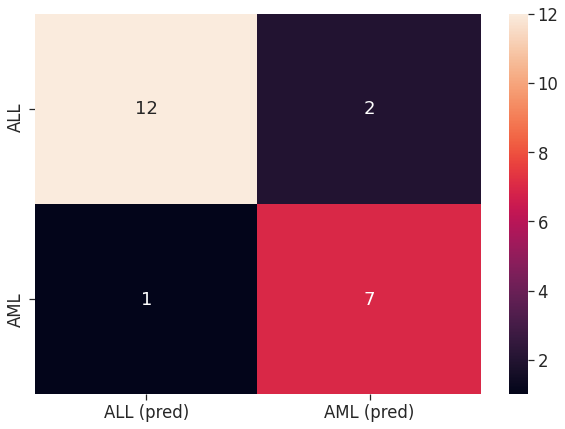

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_predict)
cm_df = pd.DataFrame(
    cm, 
    index = [idx for idx in ['ALL', 'AML']],
    columns = [col for col in ['ALL (pred)', 'AML (pred)']])
plt.figure(figsize = (10,7))
sns.heatmap(cm_df, annot=True)
plt.show()

Our confusion matrix in this case is a 2x2 table, because there are 2 different possible classes for each patient. The columns tell us what class we predicted, whereas the rows tell us what the actual class is.

*Because we randomly split the data set, your confusion matrix might look different from someone else's in the class.*

The first row tells us that for patients that should actually be classified as ALL, what our decision tree predicted their class should be. There were 14 ALL patients, and 2 were incorectly labeled.

The second row tells us that there were 8 AML patients, and 7 were classified correctly. The remaining one was predicted to be ALL, which was incorrect.

For this particular example above, there were 22 test examples, and 19 were classified correctly, for an accuracy of 86.4%. The confusion matrix helps us visualize the performance of our decision tree and in addition to the accuracy number itself, it gives us the added information of which leukemia subtype we tended to classify incorrectly.

## Logistic Regression

In regression we try to predict a dependent variable (cancer subtype) given a set of independent variables (genes). 

In linear regression we predict a continuous outcome, but logistic regression performs better with binary outcomes. **What do you think is the reason for this?**

![](https://miro.medium.com/max/640/0*gKOV65tvGfY8SMem.png)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 

# create the model
lr = LogisticRegression()
# fit the model
lr.fit(X_train,y_train)
# make predictions
y_predict_lr = lr.predict(X_test)
# calculate accuracy
accuracy = metrics.accuracy_score(np.array(y_test), y_predict_lr)
accuracy

0.9545454545454546

In [ ]:
accuracy

0.9545454545454546

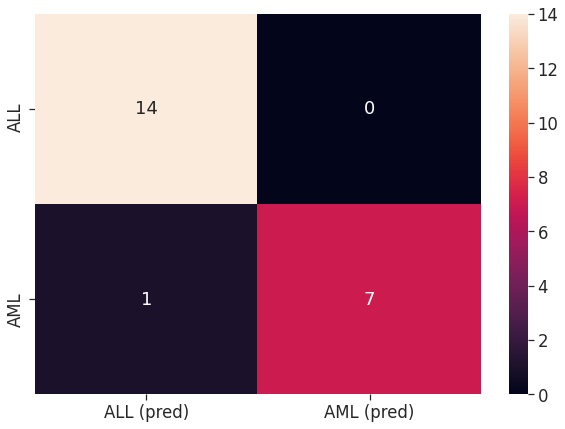

In [ ]:
# We could also do this for our logistic regression model
cm_lr = confusion_matrix(y_test,y_predict_lr)
cm_lr_df = pd.DataFrame(
    cm_lr, 
    index = [idx for idx in ['ALL', 'AML']],
    columns = [col for col in ['ALL (pred)', 'AML (pred)']])
plt.figure(figsize = (10,7))
sns.heatmap(cm_lr_df, annot=True)
plt.show()

# Challenge Problem

## Try a different machine learning algorithm. 

One option is Random Forest which is an ensemble of decision trees. Try increasing the number of trees (`n_estimators`) and see how that changes the accuracy. 

`n_estimators` is a model parameter. The parameter values will impact the performance of your model so think about them carefully! In practice its best to try a range of values. 

**Regardless of the algorithm, the process is similar:**
* Train/test split
* Define the model
* Fit the model to your data
* Make predictions
* Calculate accuracy

In [ ]:
# one example to try
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# another idea: Support Vector Machines
from sklearn.svm import SVC

In [ ]:
# or Naive Bayes
from sklearn.naive_bayes import GaussianNB